<a href="https://colab.research.google.com/github/JavierPachas/huggingface/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Classification using Hugging Face Hub

In [20]:
#!pip install transformers
import transformers
import pandas as pd

In [21]:
from google.colab import userdata
HF_TOKEN=userdata.get('HuggingFace')

###**Datasets**

In [ ]:
#! pip install datasets

In [22]:
from datasets import list_datasets

In [23]:
all_datasets = list_datasets()
print(f'There are {len(all_datasets)} datasets currently available on the Hub')
print(f'The first 10 are: {all_datasets[:10]}')

<ipython-input-23-4db0eebe615c>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 124141 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [14]:
from datasets import load_dataset

In [ ]:
emotions = load_dataset('emotion')

In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [16]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [11]:
train_ds.column_names

['text', 'label']

In [12]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [13]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [14]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Loading your own dataset

In [15]:
#dataset_url = "https//www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
#!wget {dataset_url}
#!head -n 1 train.txt
#emotions_local = load_dataset('csv', data_files = 'train.txt', sep=";", names = ['text','label'])

#or from the url
#emotions_local = load_dataset('csv', data_files = dataset_url, sep=";", names = ['text','label'])

###**From Datasets to DataFrames**

In [16]:
emotions.set_format(type = 'pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [18]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency of classes')
plt.show()

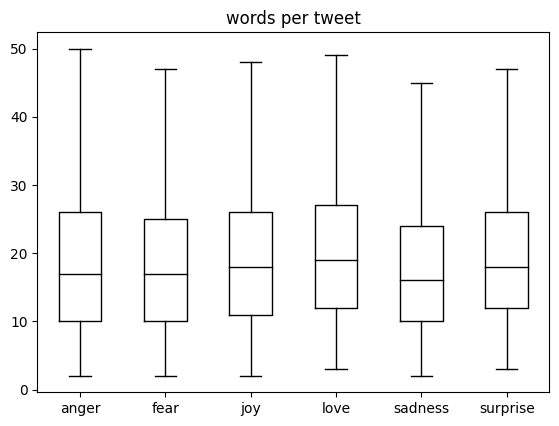

In [20]:
df['words per tweet'] = df['text'].str.split().apply(len)

df.boxplot('words per tweet', by = 'label_name', grid = False, showfliers = False, color = 'black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
emotions.reset_format()

###**From Text to Tokens**

Character tokenization

In [22]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [23]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [24]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [25]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes = len(token2idx)) #tensorflow: tf.one_hot (input_ids, depth = len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [26]:
print(f'Token: {tokenized_text[0]}')
print(f'Tensor index: {input_ids[0]}')
print(f'One hot: {one_hot_encodings[0]}')

Token: T
Tensor index: 5
One hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Word tokenization

In [27]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


Subword  Tokenization

In [28]:
from transformers import AutoTokenizer

In [29]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [30]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [31]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [32]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [33]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [34]:
tokenizer.vocab_size

30522

In [35]:
tokenizer.model_max_length

512

In [36]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

###**Tokenizing the Whole Dataset**

In [37]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)

In [38]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [39]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

In [40]:
print(emotions_encoded['train'][:2])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': [0, 0], 'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


##**Training a Text Classifier**

###Transformers as Feature Extractors

Using pretrained models

In [42]:
from transformers import AutoModel

In [43]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [44]:
#TensorFlow code
#from transformers import TFAutoModel
#tf_model = TFAutoModel.from_pretrained(model_ckpt)
#tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base', from_pt = True)

Extracting the last hidden states

In [45]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors = 'pt')
print(f"Input tensor shape: {inputs['input_ids'].size()}")
#[batch_size, n_tokens]

Input tensor shape: torch.Size([1, 6])


In [46]:
inputs = {k:v.to(device) for k, v in inputs.items()}

with torch.no_grad():
  outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [47]:
outputs.last_hidden_state.size()
#[batch_size, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [48]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [49]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  #extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [50]:
emotions_encoded.set_format("torch", columns = ['input_ids', 'attention_mask', 'label'])

In [51]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched =  True)

In [52]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Creating a feature matrix

In [53]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Visualizing the training set

In [54]:
#!pip install umap-learn

In [55]:
#UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#scaling features from 0 to 1
X_scaled = MinMaxScaler().fit_transform(X_train)
#Initialize and fit UMAP
mapper = UMAP(n_components = 2, metric = 'cosine').fit(X_scaled)
#Create a dataframe of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns = ["X","Y"])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.005820,6.368496,0
1,-3.134489,5.090990,0
2,5.388642,3.131091,3
3,-2.175348,3.221959,2
4,-3.127266,3.149974,3


In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f'label == {i}')
  axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap = cmap, gridsize = 20, linewidths = (0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

Training a simple classifier

In [57]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [58]:
#comparing out model with a dummy one
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

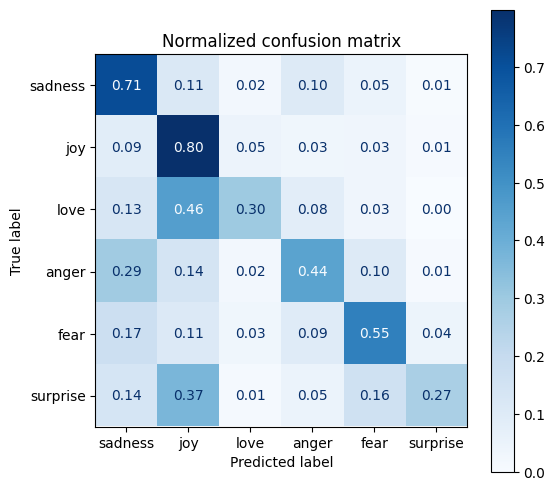

In [60]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = 'true')
  fig, ax = plt.subplots(figsize = (6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(cmap = 'Blues', values_format = '.2f', ax = ax, colorbar = True)
  plt.title('Normalized confusion matrix')
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

###Fine-Tuning Transformers

Loading a pretrained model

In [61]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Defining the performance metrics

In [70]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = 'weighted')
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1': f1}

Training the model

In [3]:
from huggingface_hub import notebook_login
notebook_login()
#huggingface-cli login

In [64]:
#!pip install -U accelerate

In [65]:
import accelerate
accelerate.__version__

'0.28.0'

In [66]:
#!pip install -U transformers[torch]

In [67]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [ ]:
#In case of error in the last cell:
#Install accelerate as said in the error message
#comment all !pip install cells
#runtime - > restart session
#do not rerun any !pip install (in case you did not comment them)

In [71]:
from transformers import Trainer

trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encoded['train'],
                  eval_dataset = emotions_encoded['validation'],
                  tokenizer = tokenizer)

trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.211100,0.183718,0.926000,0.926282
2,0.135300,0.161299,0.934000,0.934077


TrainOutput(global_step=500, training_loss=0.17320722198486327, metrics={'train_runtime': 246.16, 'train_samples_per_second': 129.997, 'train_steps_per_second': 2.031, 'total_flos': 720342861696000.0, 'train_loss': 0.17320722198486327, 'epoch': 2.0})

In [75]:
preds_output = trainer.predict(emotions_encoded['validation'])

In [76]:
pred_output.metrics

{'test_loss': 0.16129939258098602,
 'test_accuracy': 0.934,
 'test_f1': 0.9340765957896777,
 'test_runtime': 4.1096,
 'test_samples_per_second': 486.662,
 'test_steps_per_second': 7.787}

In [77]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

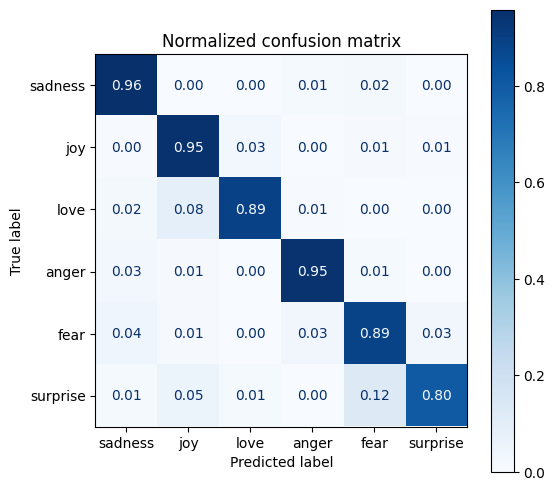

In [78]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
#Fine-tuning with Keras
#Contrary to PyTorch APi there is no Trainer class, since Keras models already provide a built-in fit() method
#from transformers import TFAutoModelForSequenceClassification

#tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels))
#column names to convert to tensorflow tensors
#tokenizer_columns = tokenizer.model_input_names

#tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
#    columns = tokenizer_columns, label_cols = ['label'], shuffle = True,
#    batch_size = batch_size
#)

#tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(
#    columns = tokenizer_columns, label_cols = ['label'], shuffle = False,
#    batch_size = batch_size
#)

#import tensorflow as tf

#tf_model.compile(
#    optimizer = tf.keras.optimizer.Adam(learning_rate = 5e-5),
#    loss = tf.keras.losses.SparseCategoricalCrossEntropy(from_logits = True),
#    metrics = tf.metrics.SparseCategoricalAccuracy()
#)

#tf_model.fit(tf_train_dataset, validation_data = tf_eval_dataset, epochs = 2)

Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

with torch.no_grad():
  output = model(**inputs)
  pred_label = torch.argmax(output.logits, axis = -1)
  loss = cross_entropy(output.logits, batch['label'].to(device),
                       reduction = 'none')
  #place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [ ]:
#convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns = ['input_ids', 'attention_mask', 'label'])
#compute loss values
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, batched = True, batch_size = 16)
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test['predicted_label'].apply(label_int2str ))

In [ ]:
df_test.sort_values('loss', ascending = False).head(10)

In [ ]:
df_test.sort_values('loss', ascending = True).head(10)

In [ ]:
trainer.push_to_hub(commit_message = 'Training completed!')

In [6]:
from transformers import pipeline

model_id = "javierpachas/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline('text-classification', model = model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


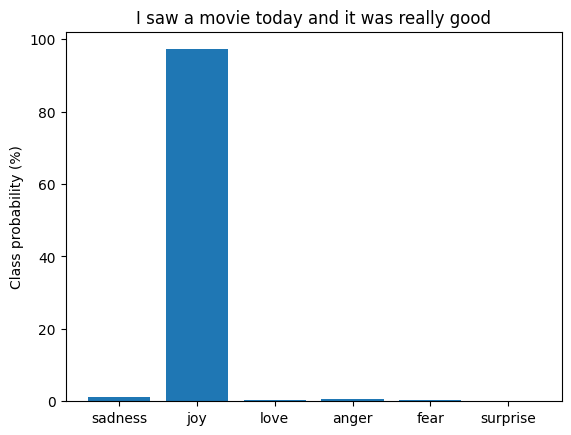

In [18]:
example_text = 'I saw a movie today and it was really good'
preds = classifier(example_text, return_all_scores = True)
#labels = ['sadness','joy','love','anger','fear','surprise']
preds_df = pd.DataFrame(preds[0])

plt.bar(labels, 100*preds_df['score'], color = 'C0')
plt.title(f'{example_text}')
plt.ylabel('Class probability (%)')
plt.show()